# HR Analysis Project

In [59]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [11]:
#read csv file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
print('No. of Rows:- ',df.shape[0])
print('No. of Columns:- ',df.shape[1])
pd.set_option('display.max_columns', None)
df.head(5)

No. of Rows:-  1470
No. of Columns:-  35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Our Dataset contains 1470 rows and 35 columns.

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

This are the columns name present in our dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1.Here as we can see total there are 1470 rows and 35 columns.

2.Here there are 9 object columns and remain all are int64 columns, and showing non-null values in all the columns still we need to check .

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null value present in out dataset.

In [17]:
#check the duplicated
df.duplicated().sum()

0

Comment:- 
    
    As we can see above there are no missing values and no duplicate vale in our dataset so it looks better and we can move ahead.

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation:- 
    
    1. Minimum age of the employee is 18 and maximum is 60.
    
    2. Daily employee average 9KM are traveling are we can see in the data.
    
    3. As we can see in the Employeecount column there are only one entry i.e 1 so this column is of no use.
    
    4. In monthly income we can see some outliers and in monthly Rate rate also.
    
    5. EmployeeCount and StandardHours are having same number of  values.

Let's try to gain some more insights for the dataset.

In [19]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

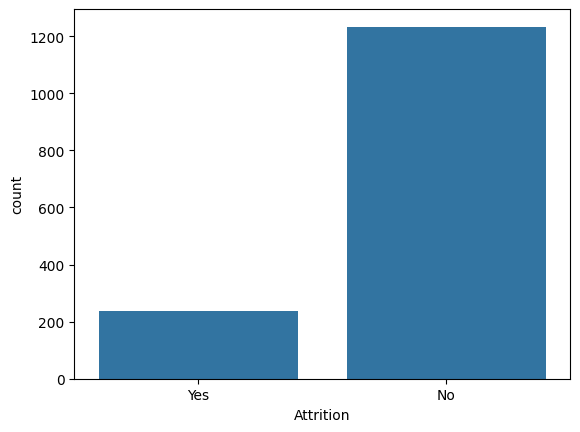

In [20]:
#plot each class frequency
sns.countplot(x = 'Attrition', data = df)
plt.show()

Around 1200+ people leave the organization and more than 200+ people are still in organization it means our data is imbalanced in taget variable, so we need to fix that.

# Enlisting the value count & sub-category of different categorical features.

In [21]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for d in Category:
    print(df[d].value_counts())
    print("="*100)
    

Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Over18
Y    1470
Name: count,

lets see in the visualization form

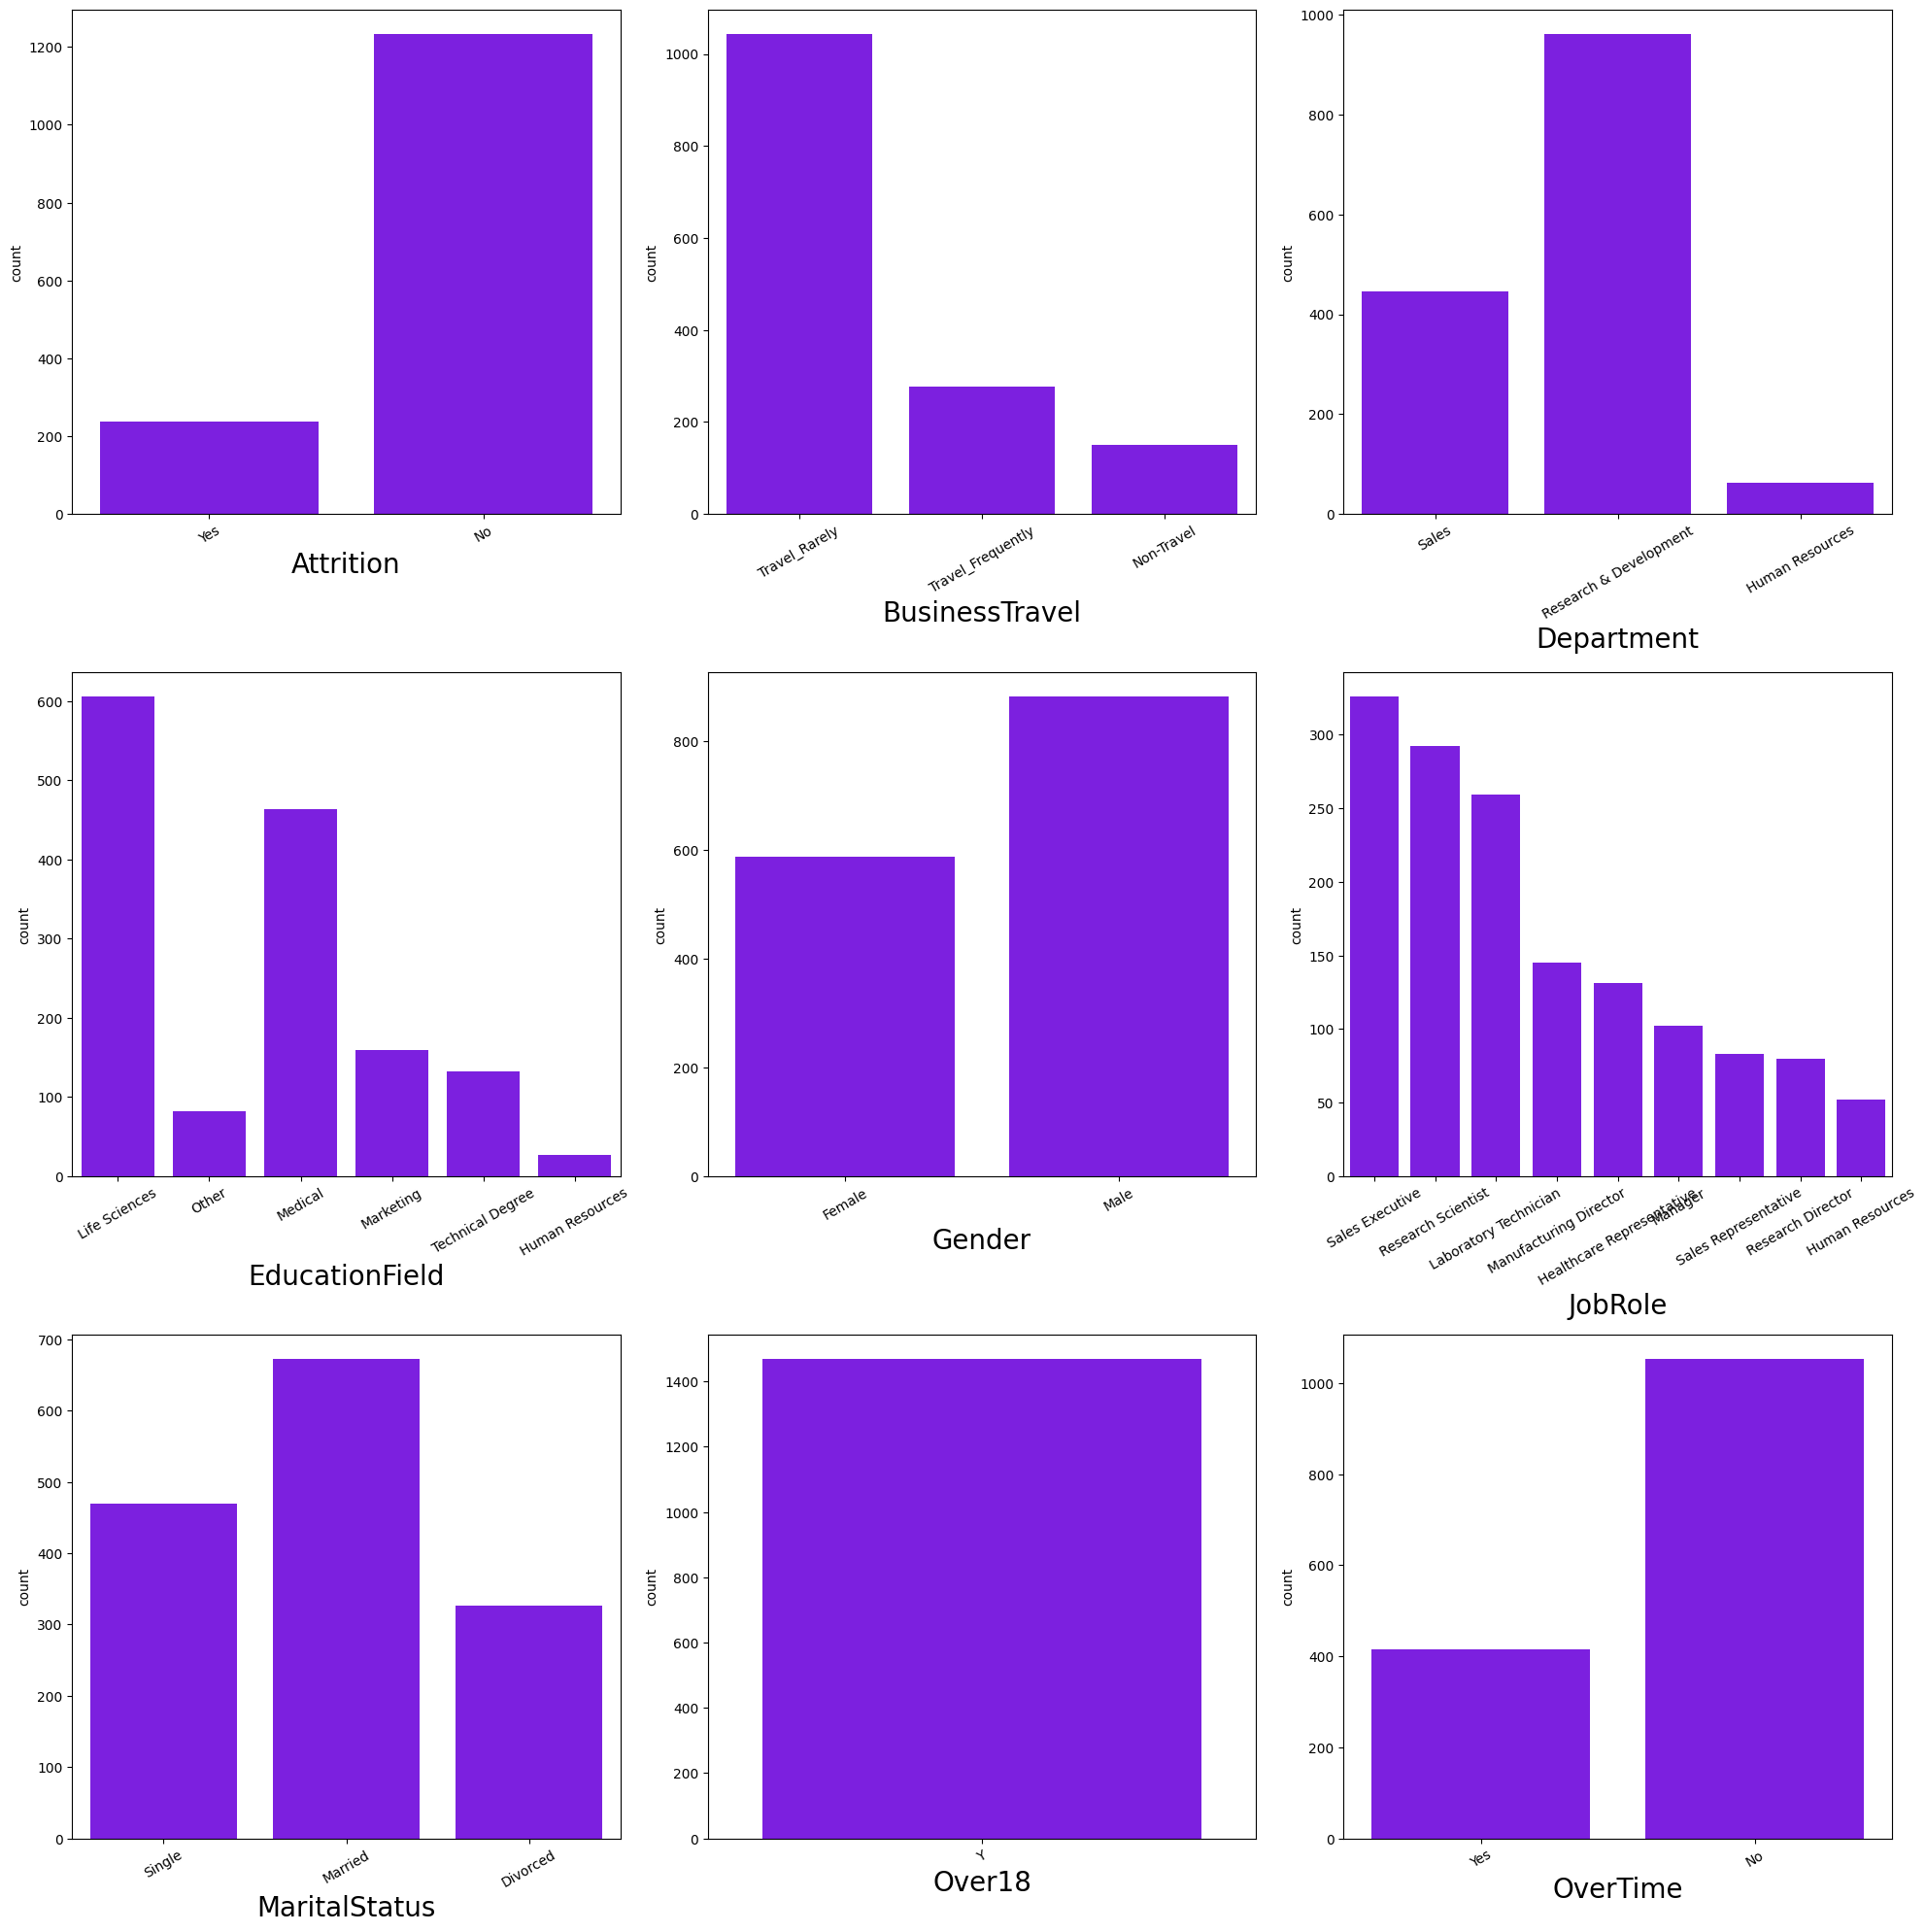

In [22]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='w')
plotnumber =1
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for d in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x = d, data = df)
        plt.xlabel(d,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

Enlisting Value counts & Sub-categories of different Ordinal features available.

In [23]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for o in Ordinal:
    print(df[o].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


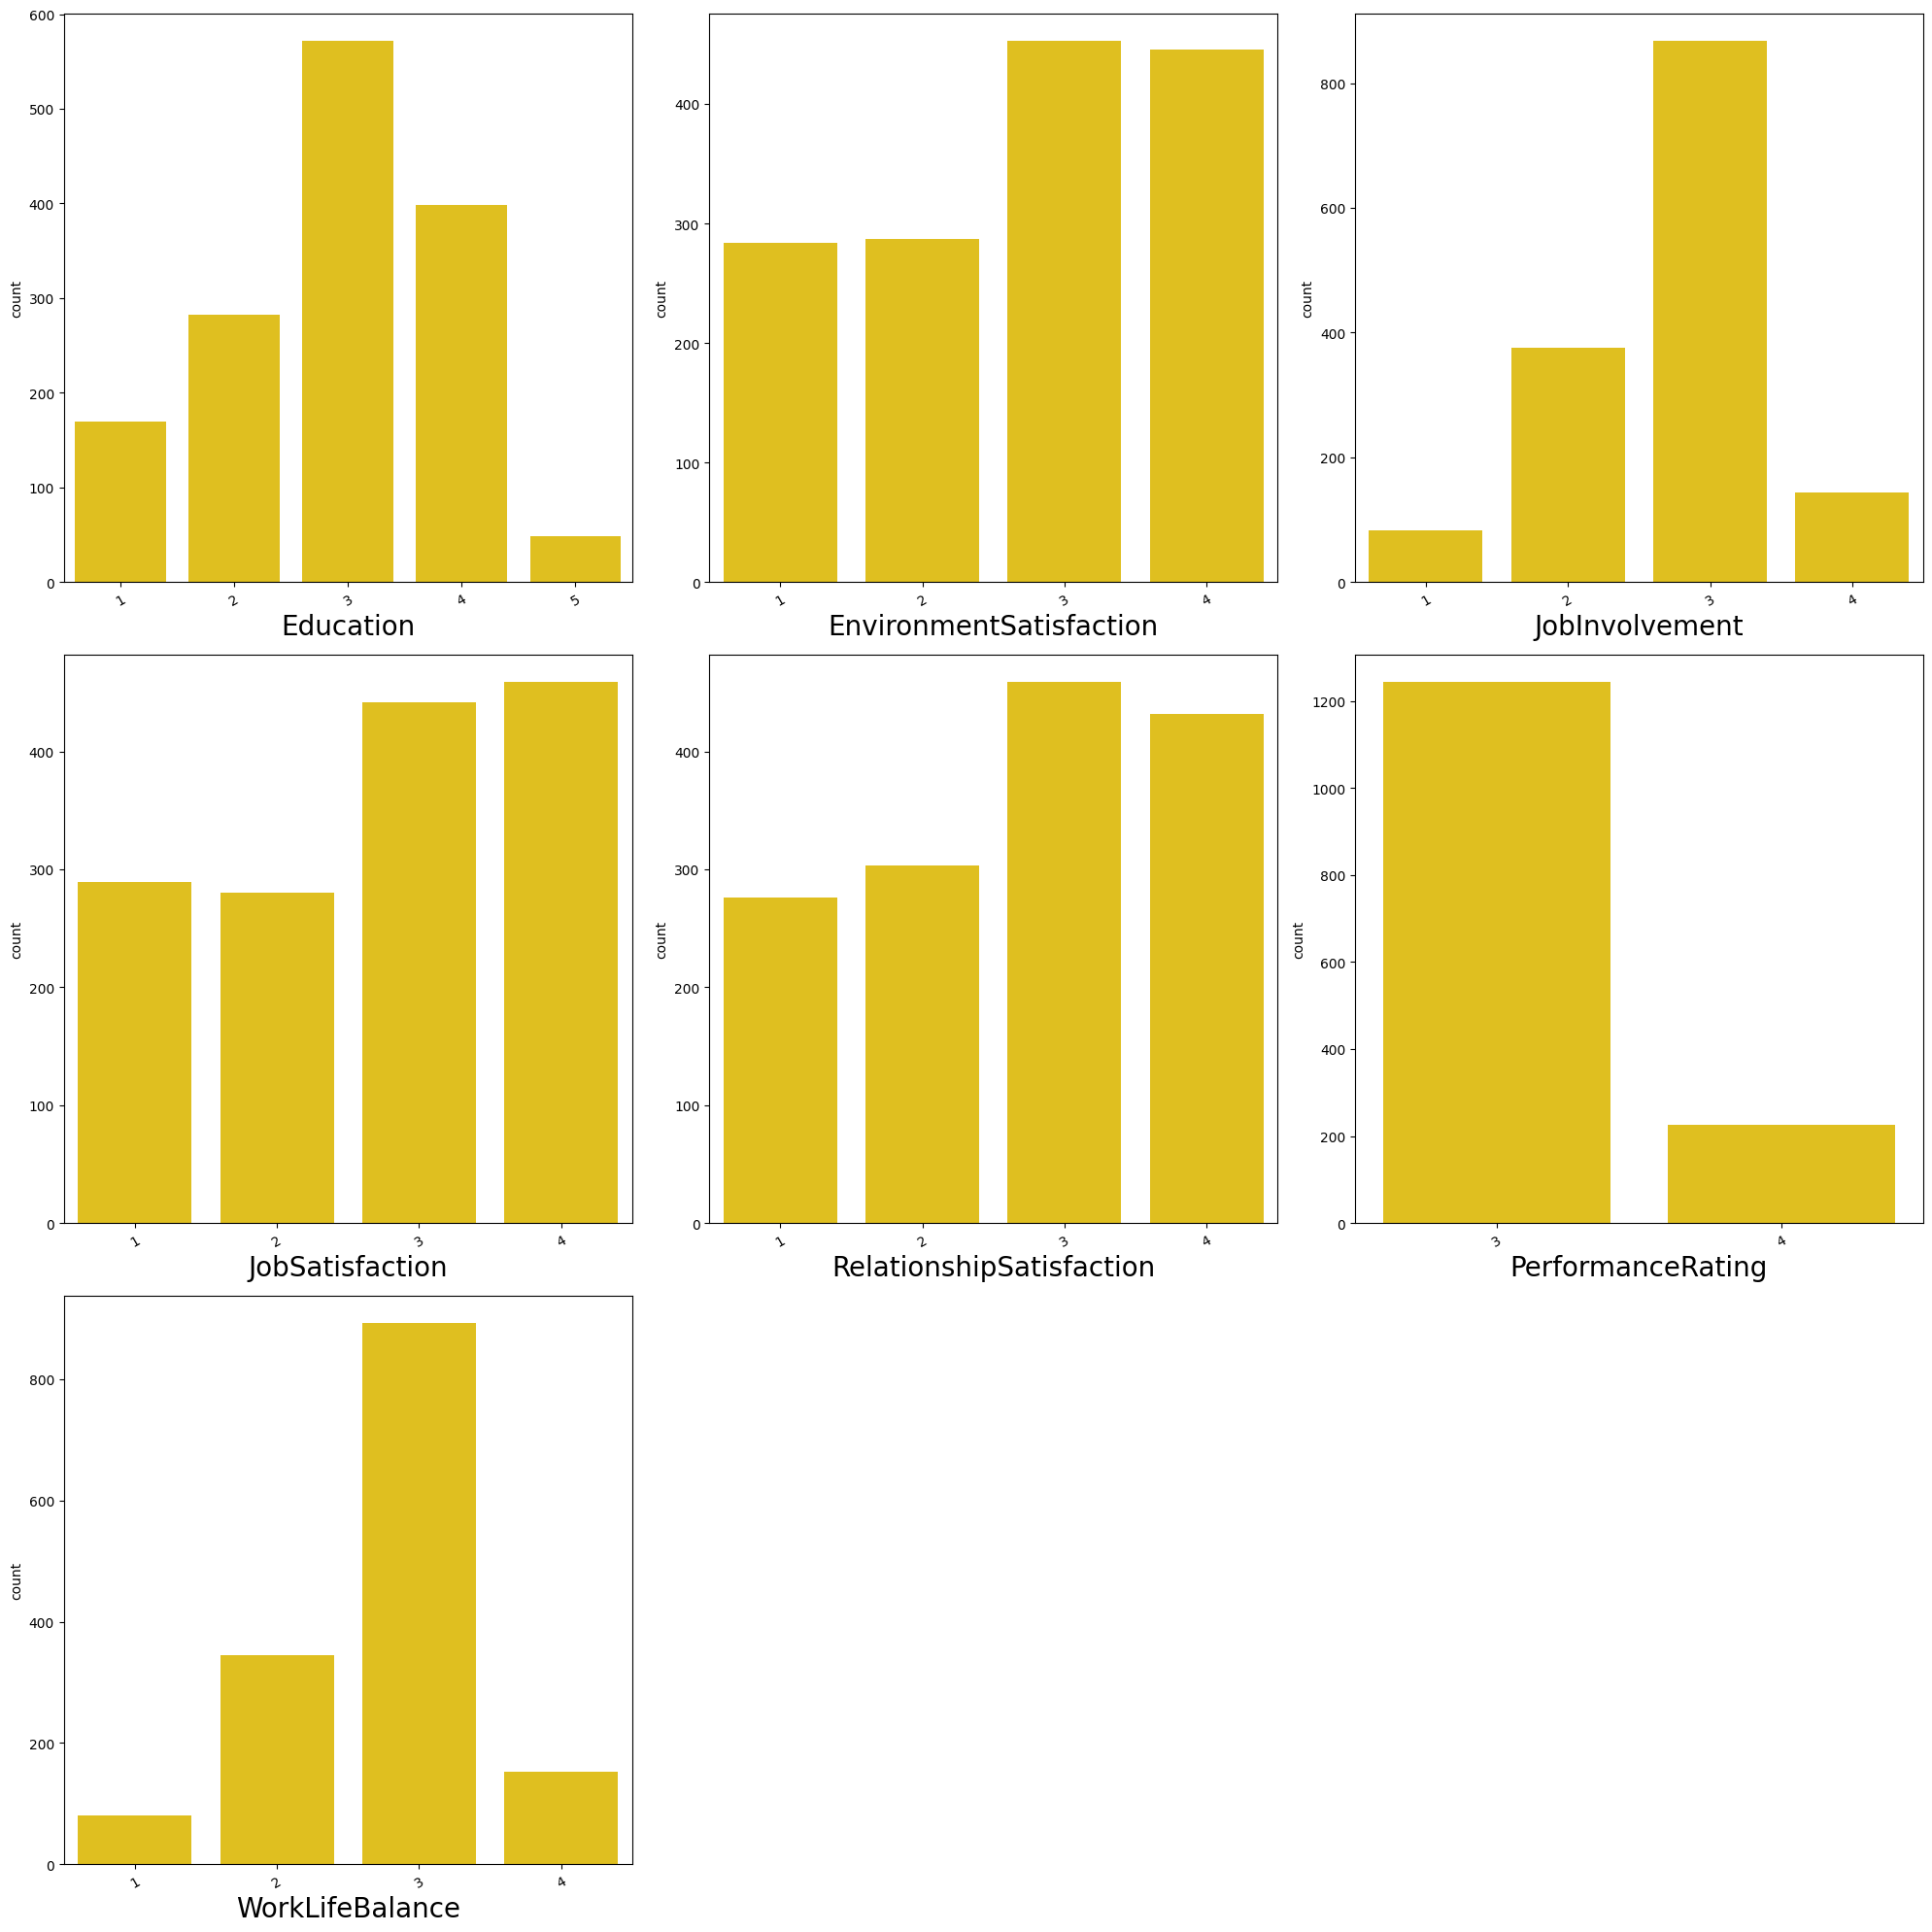

In [24]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='w')
plotnumber =1
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for o in Ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x = o, data = df)
        plt.xlabel(o,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b>These Ordinal features come with the following label encoding</b>

<b>Education</b>: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'
    
<b>EnvironmentSatisfaction</b>: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'
    
<b>JobInvolvement</b>: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
    
<b>JobSatisfaction</b>: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'
    
<b>PerformanceRating</b>: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'
    
<b>RelationshipSatisfaction</b>: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'
    
<b>WorkLifeBalance</b>: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

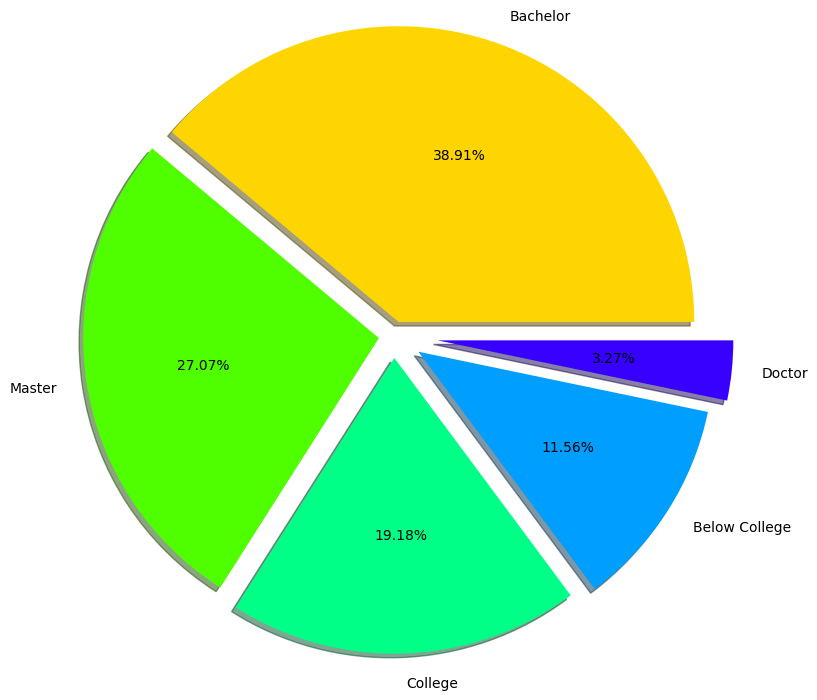

In [25]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

<b>As we can see in the pie chart :</b>
    
    1.There are around 60% of people belongs to masters and bachlor degree.
    
    2. Over 20% employee are belong to the college.
    
    3.And very less 5 of employee are in Doctor degree.
    
    4. And around 12% of below college. 

Let;s try to gain some more information about Human resource department 

In [26]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

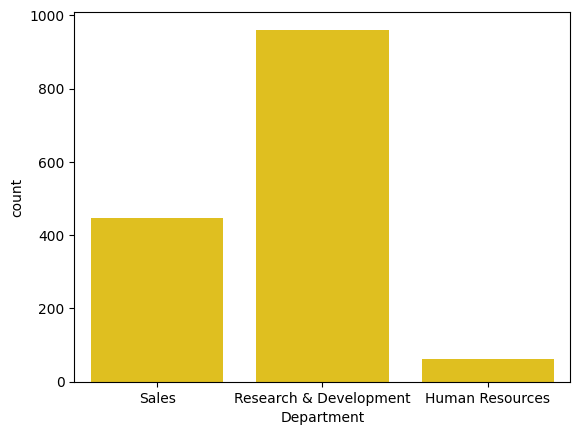

In [27]:
sns.countplot(x = 'Department', data = df)
plt.show()

In [28]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


As we can see in above graph very less employee are belongs to Human Resource department only 63 employee.

More employee are in Research & Development .



# Employee distribution as per education field and level of education

In [29]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

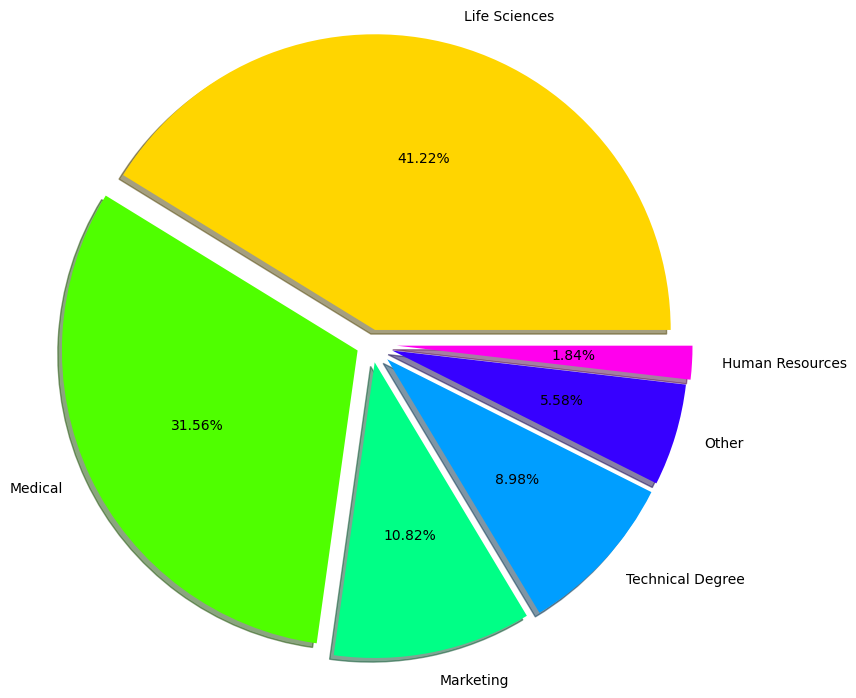

In [30]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

distribution of education vs education field

In [31]:
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [32]:
#distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


1. 41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.

2. There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that atleast half employee working in HR department do not have HR background. This important as there is more probability of Employees Retention is when they are working in domain of interest or as per their education background. Dissatisfaction with want we doing can be seen as major reason of leaving job.
Most of Employees with Techanical degree are Bachelors.

3. Most of Employees having Masters and Doctors belong to Life Science and Medical domain.

4. R&D department almost everyone comes from profession or technical background except support staff. Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.

5. There are 159 Employee with Marketing background and all work in Sales Department.

6. 50% Employees in sales department have background of Life sciences & Medical. So it will interesting to see attrition rate in these employees.

# Let's Work with Job Role

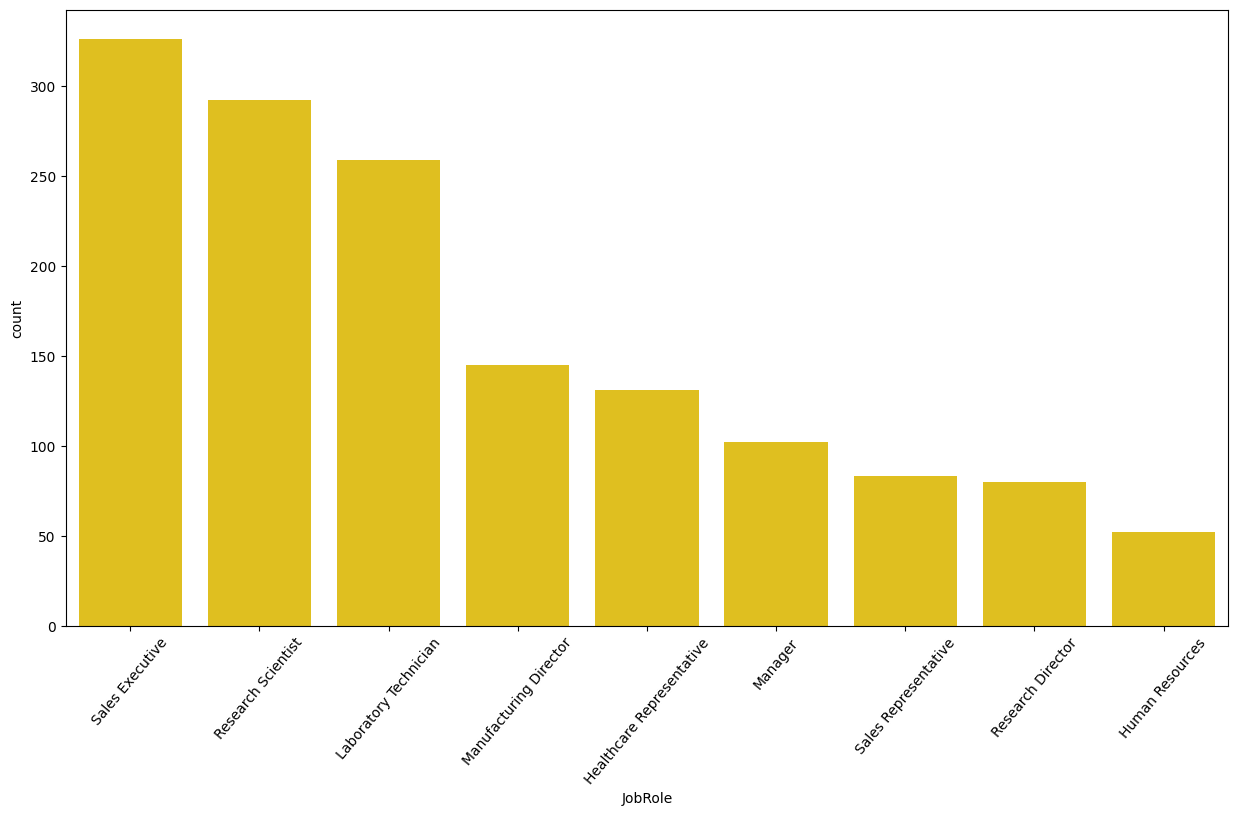

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'JobRole', data = df)
plt.xticks(rotation=50)
plt.show()

Build the matrix of department and jobrole.

In [34]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')


Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


Comment:-
    
    1.There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.
    
    2.Human Resources department has 2 Job role i.e. HR & Manager.
    
    3.There 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 1200x1000 with 0 Axes>

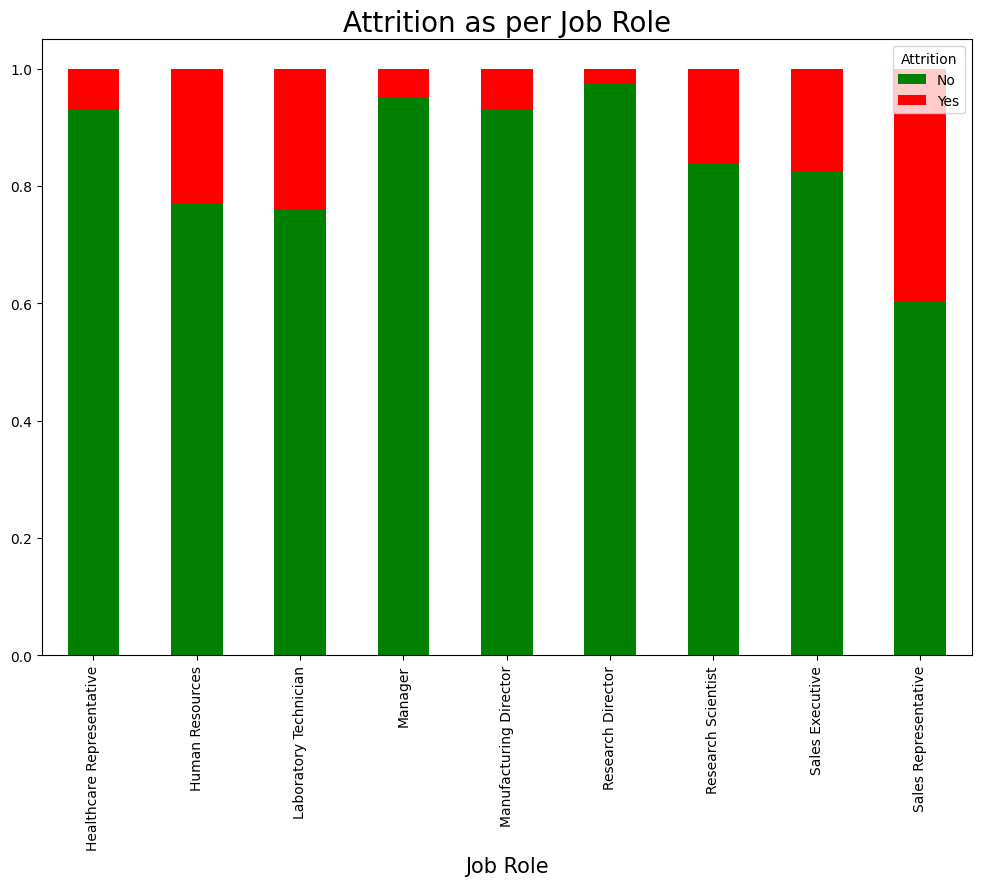

In [35]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

We can definitely see Red Signal for different Managers & HR of Respective Job Role in above barplot !!!

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [36]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')


1. Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job role comes at bottom in corparate hierachy also Salary is comparatively less compare to other job role.
Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.

2. At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.

3. 16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.

# Age Vs Attrition

In [37]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

In [38]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

<Axes: xlabel='Age', ylabel='count'>

1.The Attrition rate is minimum between the Age years of 34 and 35.

2.The Attrition rate is maximum between the Age years of 29 and 31.

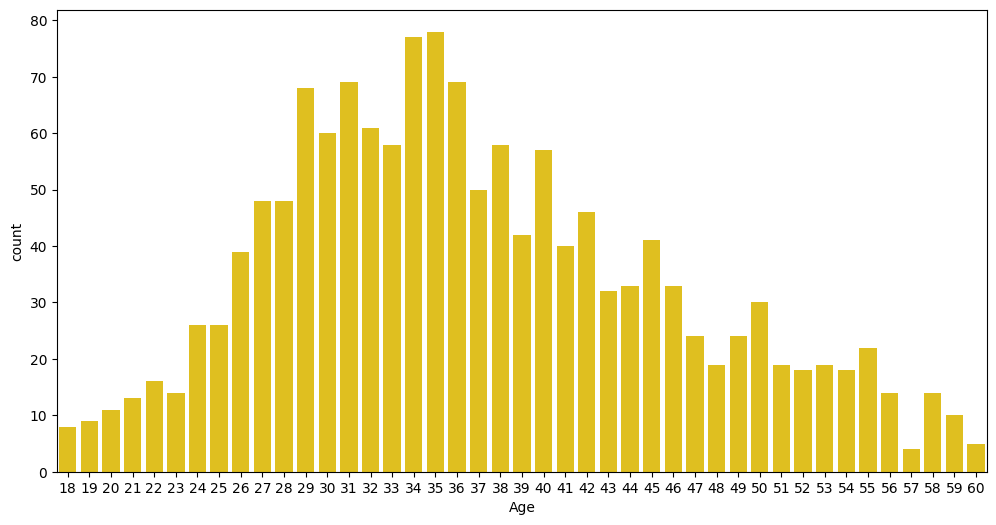

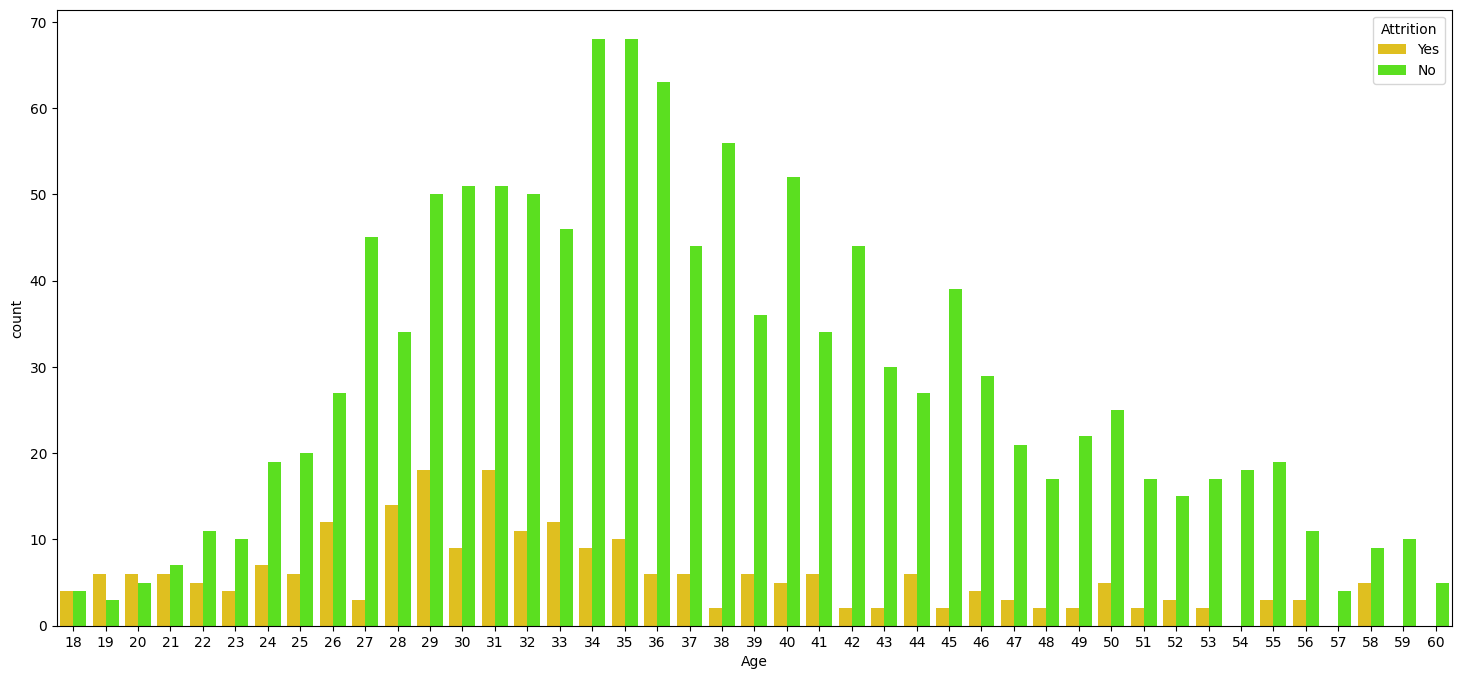

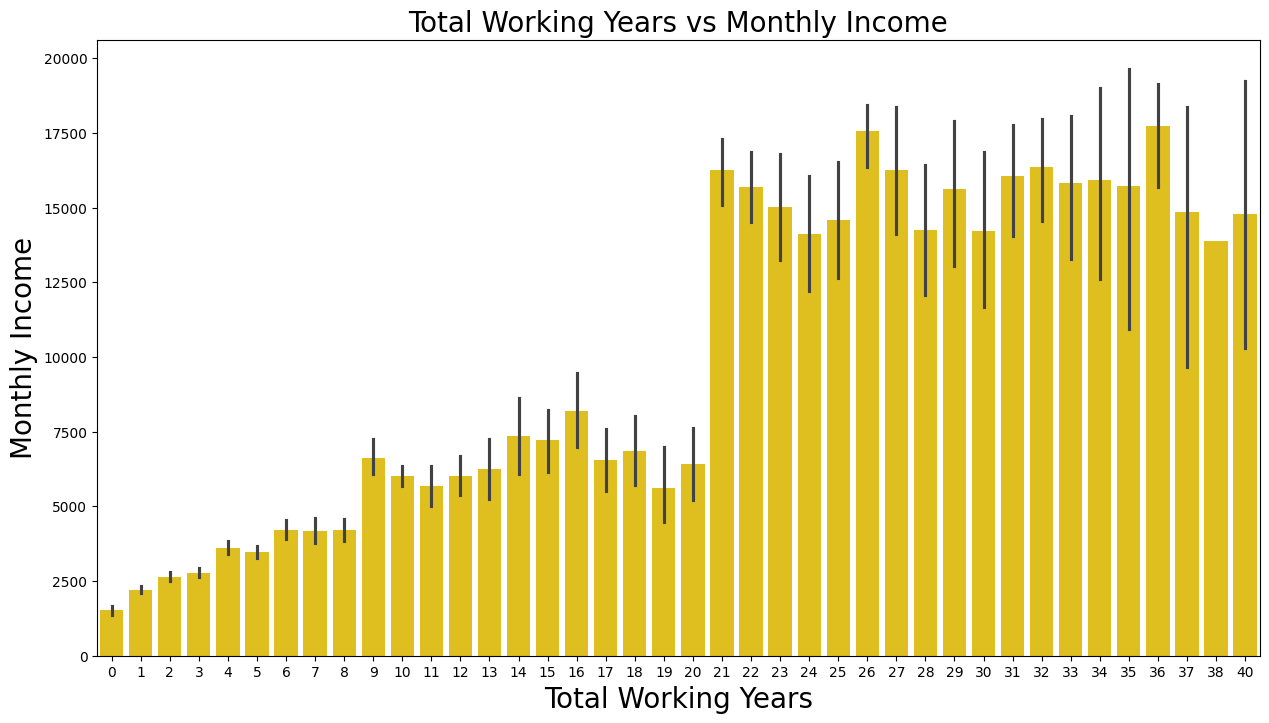

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)  
plt.xlabel('Total Working Years', fontsize=20)
plt.ylabel('Monthly Income', fontsize=20)
plt.title("Total Working Years vs Monthly Income", fontsize=20)
plt.show()


Monthly Income is highest for the employees with 21 or more number of Total Working Years.

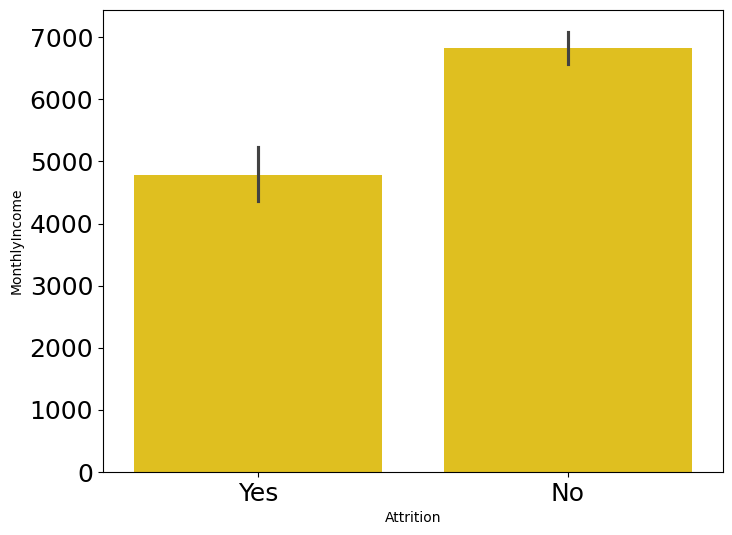

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

The Attrition rate in the employees is less when the monthly income reaches to 6900

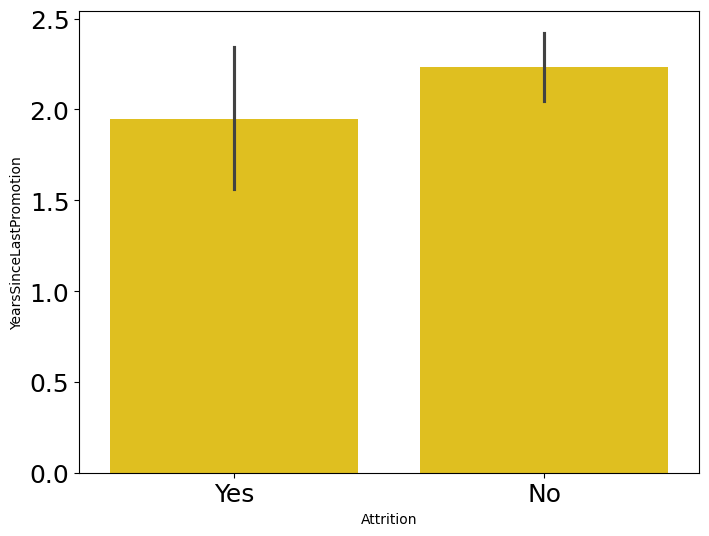

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

The rate of Attrition is high when the employee did not got promoted since 1.8 years.

# Encoding categorical data

In [42]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [43]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [44]:
df.shape

(1470, 31)

In [45]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


# Outliers Detection and Removal

In [46]:
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

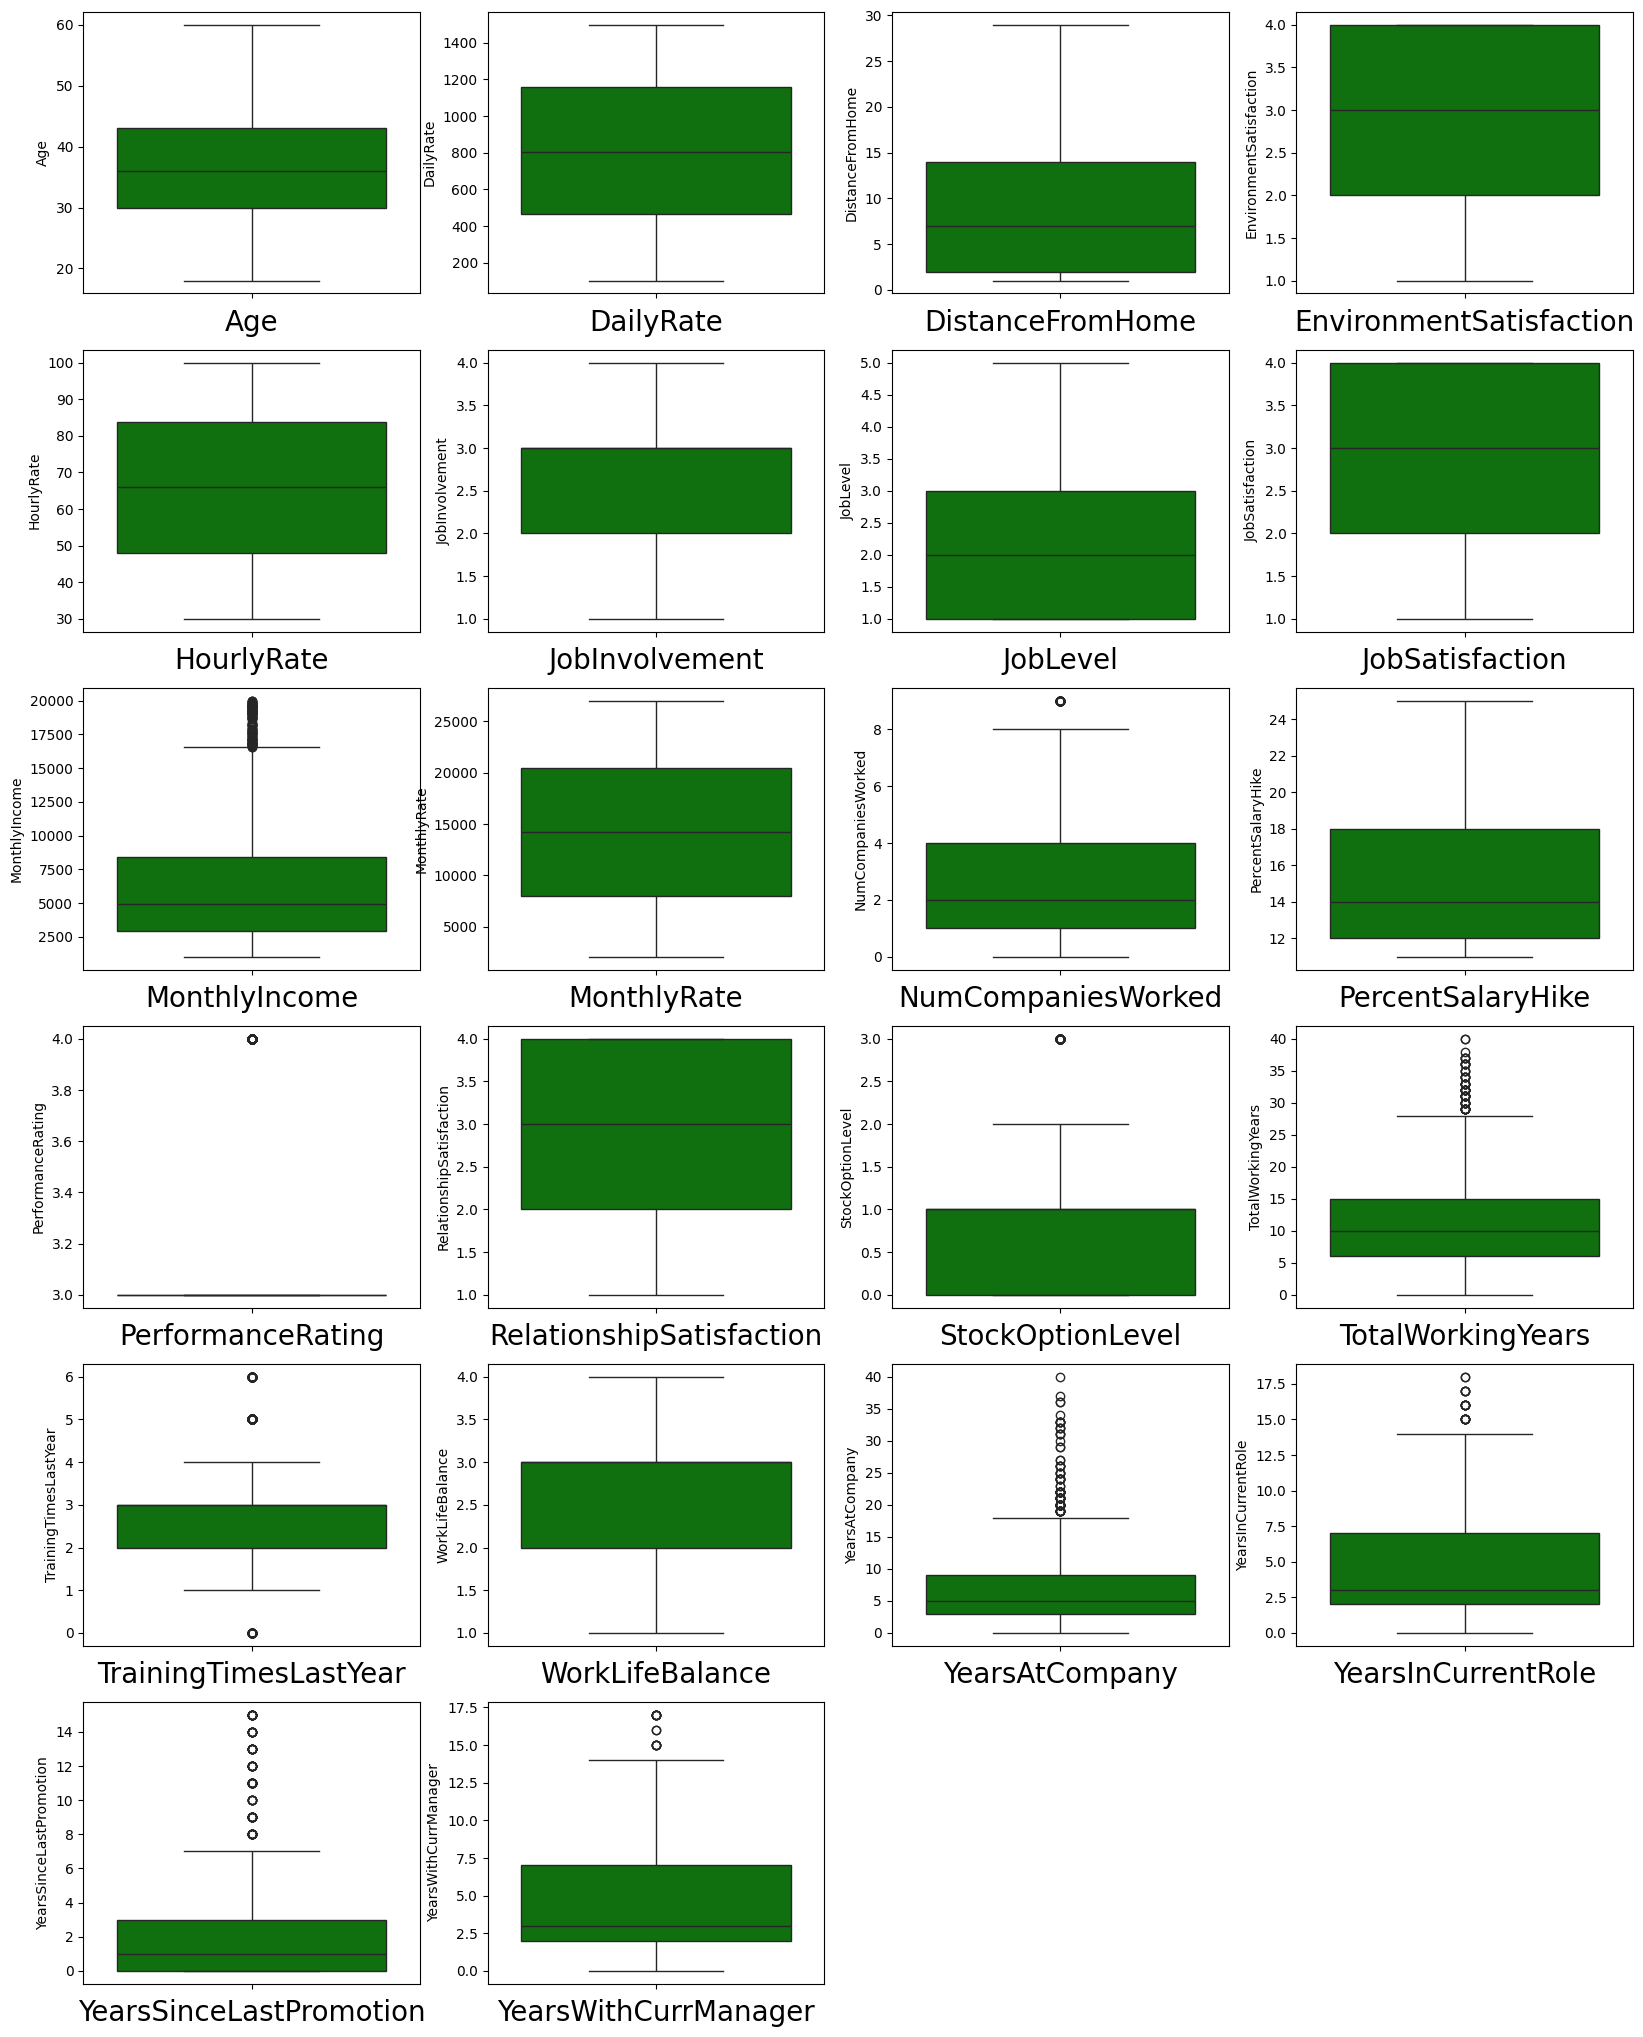

In [47]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b>Features containing outliers</b>

"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


# Feature selection and Engineering

# Skewness of features

In [49]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [50]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
y = df['Attrition']

Transforming skew data using power transform

In [51]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

1.For Numeric features skewness is transform within permissible limit.

2.For ordinal features & categorical features skew parameter irrevalent.

# Corrleation

In [52]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,0.032323,0.442350,-0.116758,0.010038,-0.117182,0.452513,0.020538,0.340022,0.028332,0.010488,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,0.018230,0.003401,-0.002615,-0.033026,0.010108,0.030793,-0.008138,0.034013,0.010934,-0.019175,-0.021061,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,0.041841,0.015931,-0.013156,0.044460,-0.076058,0.029944,-0.032890,0.034923,0.020045,0.029183,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,-0.025121,0.200829,0.681597,0.030615,0.052696,0.152234,0.023941,-0.033131,0.015121,-0.013541,-0.038429,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,0.038096,0.024038,0.010044,-0.020165,-0.027285,0.000545,0.047736,-0.010318,0.036524,0.034946,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,0.042166,0.103834,0.016548,-0.005640,-0.012237,0.112084,-0.018874,0.136101,-0.015248,-0.002095,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,-0.007969,-0.026676,0.050693,-0.050693,0.013433,-0.020033,-0.027785,-0.010403,0.010335,0.000812,-0.001393,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,-0.020953,0.010615,-0.022464,-0.009553,-0.012356,-0.011976,0.036843,0.011203,0.058274,-0.027743,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,0.014878,-0.058378,-0.036436,0.038130,-0.056779,-0.052340,-0.047240,-0.033345,-0.051558,0.010984,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,0.051979,-0.039909,-0.023758,-0.067797,-0.008966,-0.023613,-0.011438,0.019917,-0.003232,-0.015826,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


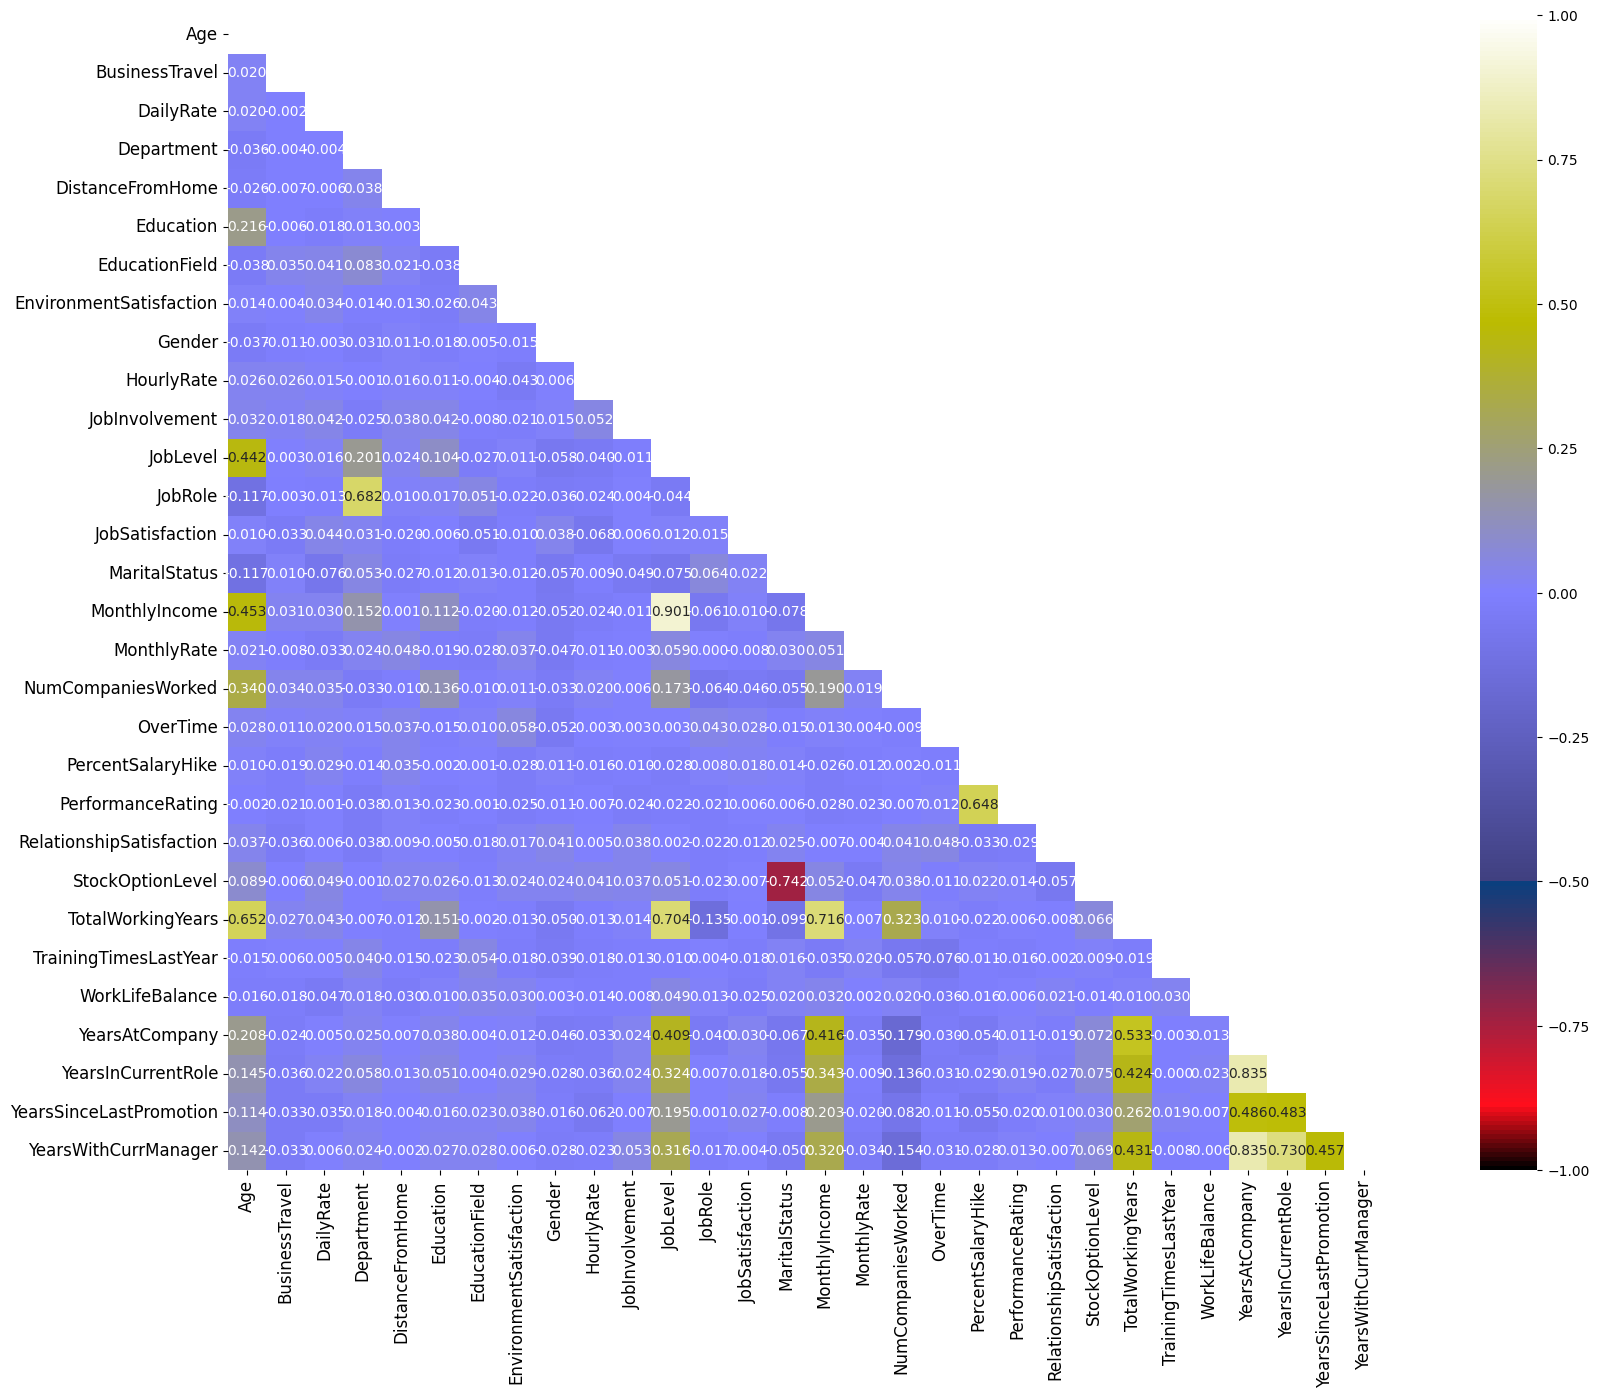

In [53]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

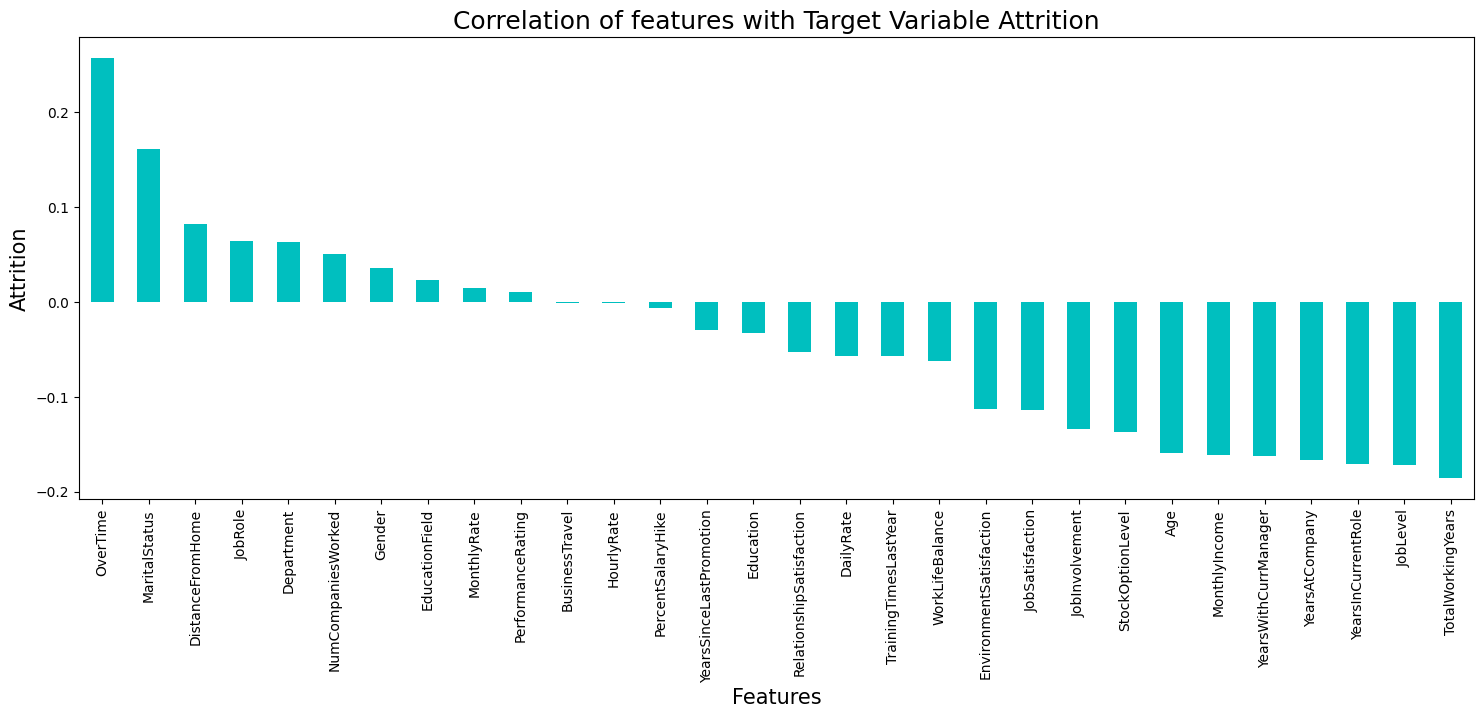

In [54]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

1. Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.

2. JobLevel is highly positively correlated with the MonthlyIncome.

3. PercentSalaryHike is highly positively correlated with the column PerformanceRating.

# Checking Multicollinearity between features using variance_inflation_factor

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


We can see that multicollinerity is within permissible limit of 10.

# Balancing using SMOTE

As our data is imbalanced so we need balance that.

In [60]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [62]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, y)

In [63]:
Y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

Standard Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [85]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [68]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [69]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

<b>Machine Learning Model Building</b>

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1551, 21)
Training target vector size: (1551,)
Test feature matrix size: (765, 21)
Test target vector size: (765,)


<b>Finding best Random state</b>

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.873202614379085 on Random_state 75


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8614379084967321


Confusion matrix of Logistics Regression : 
 [[318  50]
 [ 56 341]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       368
           1       0.87      0.86      0.87       397

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



<b>Finding Optimal value of n_neighbors for KNN</b>

In [75]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.31725950698322947
RMSE value for k=  2 is: 0.2869720215917757
RMSE value for k=  3 is: 0.34108630767160053
RMSE value for k=  4 is: 0.3313667478318056
RMSE value for k=  5 is: 0.3722392933359776
RMSE value for k=  6 is: 0.3505364702758674
RMSE value for k=  7 is: 0.3687108791699814
RMSE value for k=  8 is: 0.35791699479543954
RMSE value for k=  9 is: 0.38433373297259976
RMSE value for k=  10 is: 0.37573457465108967
RMSE value for k=  11 is: 0.4009791936316524
RMSE value for k=  12 is: 0.3877199986918664
RMSE value for k=  13 is: 0.39770583933420295
RMSE value for k=  14 is: 0.3791976393296807
RMSE value for k=  15 is: 0.39934587037179503
RMSE value for k=  16 is: 0.3877199986918664
RMSE value for k=  17 is: 0.4090479940519309
RMSE value for k=  18 is: 0.39770583933420295
RMSE value for k=  19 is: 0.4058397249567139
RMSE value for k=  20 is: 0.3927446575232716
RMSE value for k=  21 is: 0.4090479940519309
RMSE value for k=  22 is: 0.39934587037179503
RMSE value

At k= 2, we get the minimum RMSE value which approximately  0.2869, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case.

# Applying other classification algorithm

In [76]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9137254901960784


Confusion matrix : 
 [[342  26]
 [ 40 357]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       368
           1       0.93      0.90      0.92       397

    accuracy                           0.91       765
   macro avg       0.91      0.91      0.91       765
weighted avg       0.91      0.91      0.91       765



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8562091503267973


Confusion matrix : 
 [[320  48]
 [ 62 335]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       368
           1       0.87      0.84      0.86       397

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765




As we can see SVC is giving better accuracy score compare to other classifier so we will move forward to SVC classifier.

### Crossvalidation

In [77]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.625      0.68466523 0.7062635  0.6825054  0.7062635 ]
Mean Score : 0.680939524838013
Std deviation : 0.029759605455604462




Cross Validation Score SVC() :

Score : [0.58189655 0.61987041 0.60043197 0.587473   0.64362851]
Mean Score : 0.6066600878826246
Std deviation : 0.022633352928662115




Cross Validation Score GaussianNB() :

Score : [0.65732759 0.75593952 0.73866091 0.75593952 0.76673866]
Mean Score : 0.734921240783496
Std deviation : 0.03982623529140802




Cross Validation Score DecisionTreeClassifier() :

Score : [0.66594828 0.91576674 0.90928726 0.84665227 0.9049676 ]
Mean Score : 0.8485244283905564
Std deviation : 0.0945907373950546




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.70689655 0.74946004 0.73866091 0.73866091 0.71706263]
Mean Score : 0.7301482088329486
Std deviation : 0.015682798296978523




Cross Validation Score RandomForestClassifier() :

Score : [0.69181034 0.98272138

On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model.
    
As we can see when we apply cross validation it is giving more accurate score than previous .

### Hyper Parameter Tuning : GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [80]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [81]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 100}

### Final Model

In [82]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 100, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8941176470588236


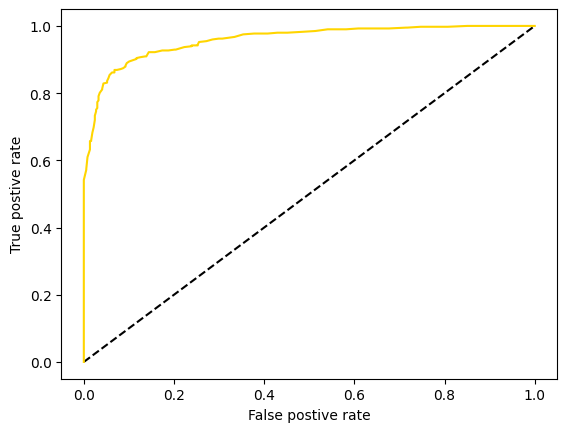

Auc Score :
 0.8946103931661374


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

#### Saving model

In [86]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']